# Keras 101 : Building a Simple Classification Neural Network with Keras

To begin we need to do some package installations. We'll be using keras to build our neural network (conda install keras), tensorflow as the backend for keras (conda install tensorflow), and scikit-learn to generate some training data (conda install scikit-learn). We will also be requiring numpy and matplotlib.

To start our python script we need to import all the necessary packages. Although we had to install the tensorflow package it is not necessary to import it.

In [2]:
import keras
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Next we need to generate some data that we wish to classify. The make_circles function imported from sklearn.datasets returns all the data we require, this consits of two arrays wrapped in a list (dataset). 

The first item in the returned list consists of x1 and x2 features (these are our input features), the second item consists of an array of labels for each pair of x1 and x2 features (these are our target labels or ground truths) these labels classify each pair of x1 and x2 features as a 1 or a 0. 

The aim of our network will be to produce a decicion boundary that seperates these two classes of data.

In [3]:
dataset = make_circles(n_samples=500,noise=0.1,factor=0.5, random_state=1)

features = dataset[0]
print("Features:",features[:10])
labels = dataset[1]
print("Labels:",labels[:10])

Features: [[ 0.19930804  0.56902277]
 [-0.15616416  0.31072201]
 [ 0.42223279  0.9327946 ]
 [-0.22081431  0.87992814]
 [ 0.50235893 -0.36354974]
 [ 0.47181124 -0.03155686]
 [-0.017868    0.51151136]
 [ 0.76001051  0.69706718]
 [ 1.07838053 -0.22967663]
 [-0.5923828   0.76194607]]
Labels: [1 1 0 0 1 1 1 0 0 0]


We can plot our data set and begin to get an idea of the how the two classes are distributed in relation to the features x1 and x2.

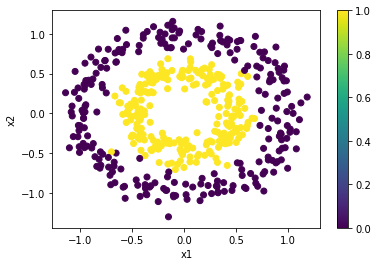

In [4]:
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()
plt.show()

We next need to generate some variables that describe some infromation about our dataset. Specifically the length of our data set, the max and min values for both x1 and x2 features.

In [5]:
data_len = features.shape[0]

x1_min = np.amin(features[:,0])
x1_max = np.amax(features[:,0])
x2_min = np.amin(features[:,1])
x2_max = np.amax(features[:,1])

print(x1_min,x1_max,x2_min,x2_max)

-1.1347888750834922 1.1832537855699603 -1.2961020431514352 1.1548947642414218


We next need to seperate our data into training and testing sets for cross validation of our model and to check for overfitting and underfitting. We are going to split our data 70% training 30% testing.

In [6]:
X_train = features[:int(data_len*0.7)]
X_test = features[int(data_len*0.3):]
y_train = labels[:int(data_len*0.7)]
y_test = labels[int(data_len*0.3):]

We can now begin to build our neural network model. At this point we need to start thinking about how we are going to train our model. To train this model we are going to feed each pair of features (x1,x2) into the network where it will output a classification between 1 and 0 for that single pair of features. This is repeated for every pair in the data set.

The training procedure will compare the network output with the corresponding label (groundtruth) and calulate a loss for that feature pair, the necessary adjustments to the network will then be made via the backpropergation and an optimzation algorithm specified later.

This network will therefore conist of an input layer of 2 features (input_dim) and an output layer of 1 neuron. 

Between the input and output layers we will place a single hidden layer 3 neurons wide. The choice of a single hidden layer is related to the simplicity of the decision boundary required due to the symmetry of the data set around 0,0 (I think...).

The network will aim to output either a 1 or 0, as such our choice of activation function is the sigmoid for all neurons in the network.

To build the model we begin by building a list of densly connected layers using the keras.layers.Dense(Number of neurons, input_dim = number of features input into the first layer of network, activation = activation function) componant. We append them to our list in the order in which they will appear in the network. The shape of our input is specified by the input_dim parameter in the first layer.

we can then pass this layers list into the keras.Sequential() constructor.

In [11]:
layers = []
layers.append(keras.layers.Dense(3,input_dim = 2, activation="sigmoid"))
layers.append(keras.layers.Dense(1, activation="sigmoid"))
model = keras.Sequential(layers)

Once built we can compile our model and assign our choice of optimizer, loss function and the metrics we wish to output inorder to monitor the progress of our training. Here we will be using the keras implimentaion of the adam optimizer for which we specify a learning rate (lr). The loss of our model will be calculated using the 'binary_crossentropy' function as we only have one output neuron (or a binary choice).

In [12]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.1), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])

We are now ready to fit our model, here we need to pass our training features (X_train) and trianing labels (y_train) as well as our testing features (X_test) and testing labels (y_test) for cross validation during the training. We also specify the batch size (for us the entire training set will be passed through the network before adjusting the weights of the network) and how many epochs we wish to train for. We also specify how much information we wish to display during training with verbose=1 so that we can monitor the training as it runs.

The model.fit() function also returns a history of useful metrics such as loss and crossvalidation loss that we can use to determine how well our network is training and our choice of hyperparameters such as learning rate.

In [13]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=X_train.shape[0],epochs=1000, verbose=1)

Train on 350 samples, validate on 150 samples
Epoch 1/1000
350/350 [==============================] - 0s 1ms/step - loss: 0.8783 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.9105 - val_binary_accuracy: 0.4467 - val_categorical_accuracy: 1.0000
Epoch 2/1000
350/350 [==============================] - 0s 7us/step - loss: 0.8483 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.9144 - val_binary_accuracy: 0.4467 - val_categorical_accuracy: 1.0000
Epoch 3/1000
350/350 [==============================] - 0s 7us/step - loss: 0.8496 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.7817 - val_binary_accuracy: 0.4467 - val_categorical_accuracy: 1.0000
Epoch 4/1000
350/350 [==============================] - 0s 7us/step - loss: 0.7431 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.6919 - val_binary_accuracy: 0.4467 - val_categorical_accuracy: 1.0000
Epoch 5/1000
350/350 [==============================] - 0s

Epoch 38/1000
350/350 [==============================] - 0s 17us/step - loss: 0.3630 - binary_accuracy: 0.8600 - categorical_accuracy: 1.0000 - val_loss: 0.3389 - val_binary_accuracy: 0.8733 - val_categorical_accuracy: 1.0000
Epoch 39/1000
350/350 [==============================] - 0s 11us/step - loss: 0.3552 - binary_accuracy: 0.8657 - categorical_accuracy: 1.0000 - val_loss: 0.3313 - val_binary_accuracy: 0.8733 - val_categorical_accuracy: 1.0000
Epoch 40/1000
350/350 [==============================] - 0s 8us/step - loss: 0.3485 - binary_accuracy: 0.8657 - categorical_accuracy: 1.0000 - val_loss: 0.3249 - val_binary_accuracy: 0.8800 - val_categorical_accuracy: 1.0000
Epoch 41/1000
350/350 [==============================] - 0s 7us/step - loss: 0.3418 - binary_accuracy: 0.8686 - categorical_accuracy: 1.0000 - val_loss: 0.3193 - val_binary_accuracy: 0.8867 - val_categorical_accuracy: 1.0000
Epoch 42/1000
350/350 [==============================] - 0s 9us/step - loss: 0.3346 - binary_accur

Epoch 75/1000
350/350 [==============================] - 0s 10us/step - loss: 0.2142 - binary_accuracy: 0.9171 - categorical_accuracy: 1.0000 - val_loss: 0.2422 - val_binary_accuracy: 0.9000 - val_categorical_accuracy: 1.0000
Epoch 76/1000
350/350 [==============================] - 0s 10us/step - loss: 0.2159 - binary_accuracy: 0.9143 - categorical_accuracy: 1.0000 - val_loss: 0.2400 - val_binary_accuracy: 0.9067 - val_categorical_accuracy: 1.0000
Epoch 77/1000
350/350 [==============================] - 0s 8us/step - loss: 0.2137 - binary_accuracy: 0.9143 - categorical_accuracy: 1.0000 - val_loss: 0.2378 - val_binary_accuracy: 0.9067 - val_categorical_accuracy: 1.0000
Epoch 78/1000
350/350 [==============================] - 0s 10us/step - loss: 0.2096 - binary_accuracy: 0.9171 - categorical_accuracy: 1.0000 - val_loss: 0.2359 - val_binary_accuracy: 0.9067 - val_categorical_accuracy: 1.0000
Epoch 79/1000
350/350 [==============================] - 0s 10us/step - loss: 0.2064 - binary_acc

Epoch 112/1000
350/350 [==============================] - 0s 13us/step - loss: 0.1775 - binary_accuracy: 0.9229 - categorical_accuracy: 1.0000 - val_loss: 0.1980 - val_binary_accuracy: 0.9133 - val_categorical_accuracy: 1.0000
Epoch 113/1000
350/350 [==============================] - 0s 12us/step - loss: 0.1764 - binary_accuracy: 0.9314 - categorical_accuracy: 1.0000 - val_loss: 0.1959 - val_binary_accuracy: 0.9200 - val_categorical_accuracy: 1.0000
Epoch 114/1000
350/350 [==============================] - 0s 12us/step - loss: 0.1753 - binary_accuracy: 0.9371 - categorical_accuracy: 1.0000 - val_loss: 0.1938 - val_binary_accuracy: 0.9200 - val_categorical_accuracy: 1.0000
Epoch 115/1000
350/350 [==============================] - 0s 8us/step - loss: 0.1745 - binary_accuracy: 0.9371 - categorical_accuracy: 1.0000 - val_loss: 0.1919 - val_binary_accuracy: 0.9200 - val_categorical_accuracy: 1.0000
Epoch 116/1000
350/350 [==============================] - 0s 8us/step - loss: 0.1735 - binary

Epoch 149/1000
350/350 [==============================] - 0s 10us/step - loss: 0.1806 - binary_accuracy: 0.9257 - categorical_accuracy: 1.0000 - val_loss: 0.1264 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 150/1000
350/350 [==============================] - 0s 17us/step - loss: 0.1207 - binary_accuracy: 0.9543 - categorical_accuracy: 1.0000 - val_loss: 0.1588 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 151/1000
350/350 [==============================] - 0s 10us/step - loss: 0.1504 - binary_accuracy: 0.9314 - categorical_accuracy: 1.0000 - val_loss: 0.1240 - val_binary_accuracy: 0.9600 - val_categorical_accuracy: 1.0000
Epoch 152/1000
350/350 [==============================] - 0s 11us/step - loss: 0.1181 - binary_accuracy: 0.9629 - categorical_accuracy: 1.0000 - val_loss: 0.1359 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 153/1000
350/350 [==============================] - 0s 11us/step - loss: 0.1302 - bina

Epoch 186/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0738 - binary_accuracy: 0.9800 - categorical_accuracy: 1.0000 - val_loss: 0.0732 - val_binary_accuracy: 0.9867 - val_categorical_accuracy: 1.0000
Epoch 187/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0727 - binary_accuracy: 0.9800 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 188/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0727 - binary_accuracy: 0.9800 - categorical_accuracy: 1.0000 - val_loss: 0.0722 - val_binary_accuracy: 0.9867 - val_categorical_accuracy: 1.0000
Epoch 189/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0717 - binary_accuracy: 0.9800 - categorical_accuracy: 1.0000 - val_loss: 0.0701 - val_binary_accuracy: 0.9867 - val_categorical_accuracy: 1.0000
Epoch 190/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0709 - binary_

Epoch 223/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0445 - binary_accuracy: 0.9914 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - val_binary_accuracy: 0.9867 - val_categorical_accuracy: 1.0000
Epoch 224/1000
350/350 [==============================] - 0s 15us/step - loss: 0.0442 - binary_accuracy: 0.9914 - categorical_accuracy: 1.0000 - val_loss: 0.0452 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 225/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0439 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0448 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 226/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0436 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0444 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 227/1000
350/350 [==============================] - 0s 19us/step - loss: 0.0431 - binary

Epoch 260/1000
350/350 [==============================] - 0s 15us/step - loss: 0.0382 - binary_accuracy: 0.9886 - categorical_accuracy: 1.0000 - val_loss: 0.0399 - val_binary_accuracy: 0.9867 - val_categorical_accuracy: 1.0000
Epoch 261/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0375 - binary_accuracy: 0.9886 - categorical_accuracy: 1.0000 - val_loss: 0.0422 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 262/1000
350/350 [==============================] - 0s 19us/step - loss: 0.0393 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0381 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 263/1000
350/350 [==============================] - 0s 15us/step - loss: 0.0365 - binary_accuracy: 0.9914 - categorical_accuracy: 1.0000 - val_loss: 0.0387 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 264/1000
350/350 [==============================] - 0s 14us/step - loss: 0.0379 - bina

Epoch 297/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0318 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0338 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 298/1000
350/350 [==============================] - 0s 21us/step - loss: 0.0316 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0335 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 299/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0316 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0337 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 300/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0315 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0333 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 301/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0313 - binary

Epoch 334/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0285 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0307 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 335/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0284 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0305 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 336/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0283 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0306 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 337/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0282 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0304 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 338/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0282 - binary_

Epoch 371/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0263 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0295 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 372/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0266 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0283 - val_binary_accuracy: 0.9867 - val_categorical_accuracy: 1.0000
Epoch 373/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0273 - binary_accuracy: 0.9886 - categorical_accuracy: 1.0000 - val_loss: 0.0321 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 374/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0291 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0314 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 375/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0330 - binary

Epoch 408/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0277 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0293 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 409/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0264 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0301 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 410/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0268 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0285 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 411/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0258 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0281 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 412/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0265 - binar

Epoch 445/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0226 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0253 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 446/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0226 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0249 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 447/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0225 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0249 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 448/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0224 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0250 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 449/1000
350/350 [==============================] - 0s 19us/step - loss: 0.0224 - binar

Epoch 482/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0212 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0238 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 483/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0212 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0238 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 484/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0211 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0238 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 485/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0211 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0237 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 486/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0211 - binary_

Epoch 519/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0200 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0227 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 520/1000
350/350 [==============================] - 0s 14us/step - loss: 0.0200 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0227 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 521/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0200 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0226 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 522/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0200 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0226 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 523/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0199 - bina

Epoch 556/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0191 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0217 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 557/1000
350/350 [==============================] - 0s 13us/step - loss: 0.0190 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0217 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 558/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0190 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0217 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 559/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0190 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0217 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 560/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0190 - binary_a

Epoch 593/1000
350/350 [==============================] - 0s 15us/step - loss: 0.0320 - binary_accuracy: 0.9886 - categorical_accuracy: 1.0000 - val_loss: 0.0278 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 594/1000
350/350 [==============================] - 0s 22us/step - loss: 0.0347 - binary_accuracy: 0.9886 - categorical_accuracy: 1.0000 - val_loss: 0.0367 - val_binary_accuracy: 0.9867 - val_categorical_accuracy: 1.0000
Epoch 595/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0348 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0244 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 596/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0268 - binary_accuracy: 0.9914 - categorical_accuracy: 1.0000 - val_loss: 0.0230 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 597/1000
350/350 [==============================] - 0s 14us/step - loss: 0.0190 - bina

Epoch 630/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0180 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0197 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 631/1000
350/350 [==============================] - 0s 13us/step - loss: 0.0177 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0200 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 632/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0175 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0205 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 633/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0177 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0197 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 634/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0178 - binar

Epoch 667/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0168 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0197 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 668/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0168 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0193 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 669/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0168 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0196 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 670/1000
350/350 [==============================] - 0s 19us/step - loss: 0.0168 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0194 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 671/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0167 - binary_

Epoch 704/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0203 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0195 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 705/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0171 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0198 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 706/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0168 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0232 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 707/1000
350/350 [==============================] - 0s 36us/step - loss: 0.0190 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0201 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 708/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0198 - bina

Epoch 741/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0157 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0186 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 742/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0158 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0179 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 743/1000
350/350 [==============================] - 0s 18us/step - loss: 0.0158 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0187 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 744/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0158 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0179 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 745/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0158 - binar

Epoch 778/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0231 - binary_accuracy: 0.9914 - categorical_accuracy: 1.0000 - val_loss: 0.0246 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 779/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0211 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0184 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 780/1000
350/350 [==============================] - 0s 15us/step - loss: 0.0186 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0197 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 781/1000
350/350 [==============================] - 0s 14us/step - loss: 0.0161 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0182 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 782/1000
350/350 [==============================] - 0s 13us/step - loss: 0.0152 - binar

Epoch 815/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0148 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0175 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 816/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0148 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0170 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 817/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0148 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0177 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 818/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0149 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0169 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 819/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0150 - binary

Epoch 852/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0151 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0181 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 853/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0149 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0167 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 854/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0148 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0177 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 855/1000
350/350 [==============================] - 0s 15us/step - loss: 0.0146 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0168 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 856/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0144 - binar

Epoch 889/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0142 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0170 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 890/1000
350/350 [==============================] - 0s 19us/step - loss: 0.0140 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0176 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 891/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0142 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0168 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 892/1000
350/350 [==============================] - 0s 16us/step - loss: 0.0146 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0182 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 893/1000
350/350 [==============================] - 0s 13us/step - loss: 0.0147 - binar

Epoch 926/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0139 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0166 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 927/1000
350/350 [==============================] - 0s 14us/step - loss: 0.0136 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0163 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 928/1000
350/350 [==============================] - 0s 30us/step - loss: 0.0139 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0180 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 929/1000
350/350 [==============================] - 0s 10us/step - loss: 0.0144 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0161 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 930/1000
350/350 [==============================] - 0s 11us/step - loss: 0.0150 - binar

Epoch 963/1000
350/350 [==============================] - 0s 17us/step - loss: 0.0134 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0171 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 964/1000
350/350 [==============================] - 0s 13us/step - loss: 0.0137 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0167 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 965/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0147 - binary_accuracy: 0.9943 - categorical_accuracy: 1.0000 - val_loss: 0.0199 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 966/1000
350/350 [==============================] - 0s 12us/step - loss: 0.0157 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0162 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000
Epoch 967/1000
350/350 [==============================] - 0s 9us/step - loss: 0.0155 - binary

Epoch 1000/1000
350/350 [==============================] - 0s 8us/step - loss: 0.0131 - binary_accuracy: 0.9971 - categorical_accuracy: 1.0000 - val_loss: 0.0159 - val_binary_accuracy: 0.9933 - val_categorical_accuracy: 1.0000


We can then plot the loss and cross validation loss (based on training and test data respectively) in order to determine hwo well our network has trained as well as look for signs of overfitting and underfitting.

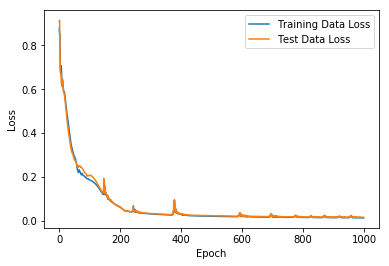

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,loss, label='Training Data Loss')
plt.plot(epoch,val_loss,label='Test Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


We now want to plot our decicion boundary for our trainined model. we do this by building a mesh the size of our x1 and x2 limits.

In [69]:
xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

We can pass this mesh into the model.predict() function that returns a classification prediction for every point in the mesh. We can then plot this in order to visulize our trained decision boundary.

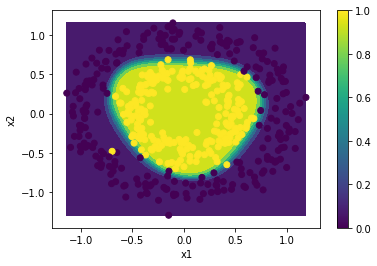

In [70]:
z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()